<a href="https://colab.research.google.com/github/skywalker0803r/Wastewater-Biological-Treatment/blob/main/Observation_time_delay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
import warnings 
import numpy as np
warnings.filterwarnings('ignore')
import pandas as pd
drive.mount('/content/drive')
path = '/content/drive/MyDrive/專案工作承攬契約書_廢水生物處理/20210101-20220831資料(品管數據Event)-20220928.xlsx'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 對應表

In [2]:
df = pd.read_excel(path,index_col=0)
對應表 = df.iloc[1:3,:]
對應表.index = ['中文名稱','英文名稱']
對應表.T

,中文名稱,英文名稱
Input,T752入料量,PHL-WS-FI7C01_PV
Output,T752溶氧,PHL-WS-AT7C03_PV
Input.1,T752導電度計,PHL-WS-AT7C02_PV
Input.2,T752溫度,PHL-WS-TT7C09_PV
Input.3,T752 液位,PHL-WS-T752-LEVEL_PV
Input.4,T752曝氣量,PHL-WS-FIT7C04_PV
Output.1,放流水量,PHL-WS-FI7E01_PV
Input.5,T752排泥量,PHL-WS-FI7C05_PV
Input.6,T-752食微比,T-752食微比
Input.7,T751COD濃度,PHL_T751-COD_ppm


# 檢查資料

In [3]:
df.columns = 對應表.T['英文名稱'].values.tolist()
df = df.iloc[3:,:]
# to_datetime
df.index = pd.to_datetime(df.index)
# to_numeric
for i in df.columns:
  df[i] = pd.to_numeric(df[i],errors='coerce')
df

,PHL-WS-FI7C01_PV,PHL-WS-AT7C03_PV,PHL-WS-AT7C02_PV,PHL-WS-TT7C09_PV,PHL-WS-T752-LEVEL_PV,PHL-WS-FIT7C04_PV,PHL-WS-FI7E01_PV,PHL-WS-FI7C05_PV,T-752食微比,PHL_T751-COD_ppm,...,PHL_A771-SS,PHL_A771-PHL,PHL_S7511-PO4,PHL_S7512-PO4,PHL_S7511-NH3,PHL_S7512-NH3,PHL_T751-pH,PHL_S7512-pH,PHL_A771-pH,PHL_S7512-SS
2021-01-01 00:00:00,30.833108,3.286289,13455.781850,30.917607,82.792742,NaN,153.078133,7.775581,NaN,NaN,...,13.0,NaN,21.6,2.46,NaN,NaN,7.7,8.1,8.4,29.0
2021-01-01 00:30:00,30.824920,3.249190,13544.369006,30.906732,82.794224,NaN,152.691545,7.801781,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-01 01:00:00,30.817218,3.212090,13692.186663,30.896172,82.795705,NaN,152.547371,8.441985,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-01 01:30:00,30.809515,3.174991,13524.119119,30.885612,82.797186,NaN,152.464886,7.955894,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-01 02:00:00,30.801812,3.137892,13564.085671,30.875052,82.798668,NaN,152.925640,7.796114,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-31 21:30:00,35.768714,2.940454,13319.257346,37.123735,82.623431,1159.716954,173.315093,4.940935,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-08-31 22:00:00,35.998689,2.926293,13170.528166,37.127622,82.615112,1153.971186,171.440216,4.914889,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-08-31 22:30:00,35.954481,2.913440,13191.728676,37.136033,82.607325,1150.363080,165.378326,4.901071,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-08-31 23:00:00,35.887392,2.920160,13267.031345,37.133538,82.613535,1149.097798,167.871083,4.828498,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 欄位定義

In [4]:
x_col = [
    'PHL-WS-AT7C02_PV',#導電度
    'PHL-WS-TT7C09_PV',#溫度
    'PHL-WS-T752-LEVEL_PV',#液位
    'PHL-WS-FIT7C04_PV',#曝氣量
    'PHL-WS-FI7C05_PV',#排泥量
    'PHL_T752-MLSS',#MLSS
    'T-752食微比'#食微比
    ]
y_col = [
    'PHL-WS-FI7E01_PV',#放流水量
    'PHL_A771-pH',#PH
    'PHL_A771-COD_ppm',#COD
    'PHL_A771-SS',#SS
    'PHL_A771-PHL',#Phenol
]

# 檢查缺失值

In [5]:
df = df[x_col+y_col]
import requests
url = 'https://gist.githubusercontent.com/skywalker0803r/c92f4651ccbd0640c2a8c97c017092d9/raw/adedbf1159e92402f32b8d961f6db70a1b0c95ad/DataPreprocessingArmory.py'
exec(requests.get(url).text)
missing_values = missing_values_table(df)
missing_values

Your selected dataframe has 12 columns.
There are 7 columns that have missing values.


,Missing Values,% of Total Values
PHL_A771-PHL,28767,98.6
PHL_T752-MLSS,28741,98.5
T-752食微比,28741,98.5
PHL_A771-COD_ppm,27850,95.4
PHL_A771-SS,27618,94.6
PHL_A771-pH,27616,94.6
PHL-WS-FIT7C04_PV,22532,77.2


# 計算採樣頻率

In [6]:
def get_interval(df,col):
    interval = [t for t,i in enumerate(df[col]) if str(i) != 'nan']
    interval = [ i-j for i,j in zip(interval[1:],interval[:-1])]
    return max(interval,key=interval.count)
temp = pd.DataFrame({'欄位名稱': [i for i in missing_values.index], '採樣頻率': [get_interval(df, i) for i in missing_values.index]})
temp

,欄位名稱,採樣頻率
0,PHL_A771-PHL,48
1,PHL_T752-MLSS,48
2,T-752食微比,48
3,PHL_A771-COD_ppm,16
4,PHL_A771-SS,16
5,PHL_A771-pH,16
6,PHL-WS-FIT7C04_PV,1


48*30分鐘 = 1440分鐘 = 24小時 = 一天

16*30分鐘 = 480分鐘 = 8小時

# 視覺化檢查

In [7]:
# 安裝此套件進行濾波
!pip install --upgrade tsmoothie

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from tsmoothie.smoother import LowessSmoother
np.random.seed(123)
data = df.fillna(method='ffill')
data = data.fillna(method='bfill')
data = data.head(48) # 半小時一筆一天有24小時相當於48筆我們先以48筆來看,平滑因子不要太高
data = data.T.values
smoother = LowessSmoother(smooth_fraction=0.1,iterations=1)
smoother.smooth(data)

<tsmoothie.smoother.LowessSmoother>

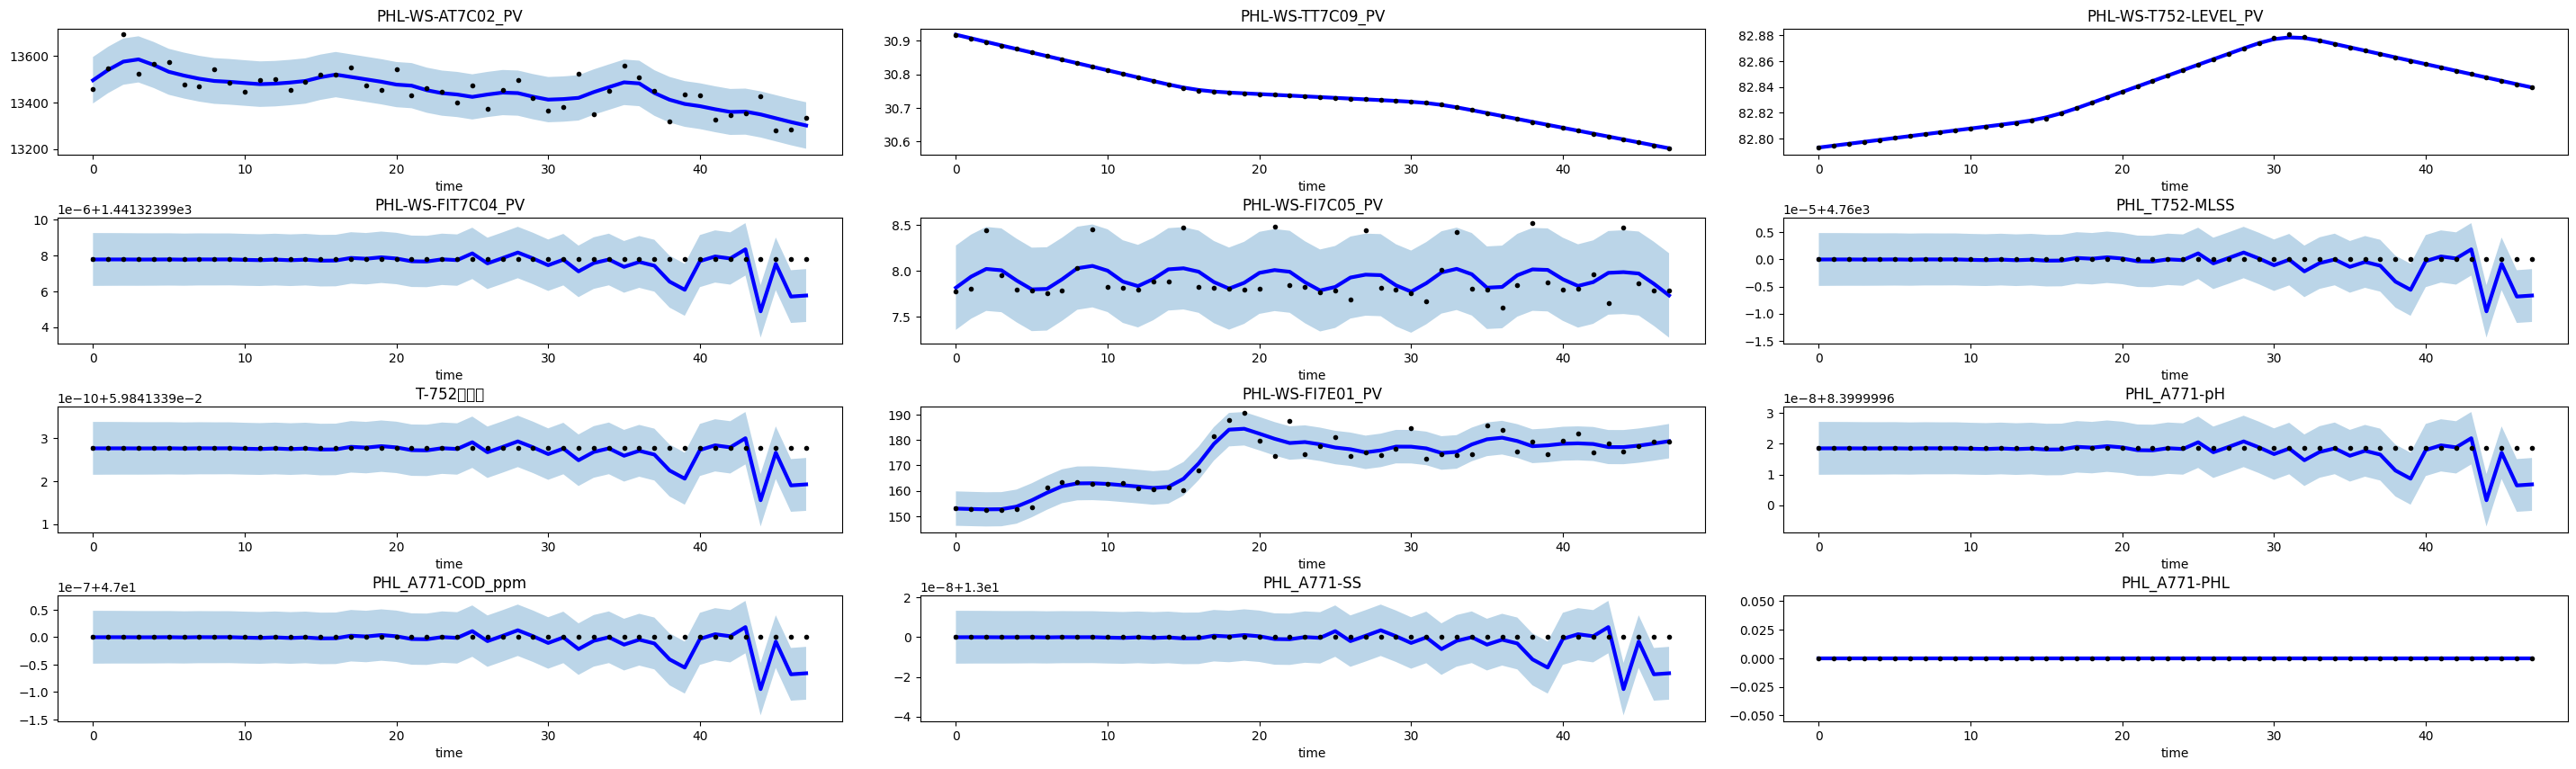

In [9]:
low, up = smoother.get_intervals('prediction_interval')
plt.figure(figsize=(36,10))
titles = df.columns.tolist()
for i in range(len(titles)):
    plt.subplot(4,3,i+1)
    plt.plot(smoother.smooth_data[i], linewidth=3, color='blue')
    plt.plot(smoother.data[i], '.k')
    plt.title(titles[i])
    plt.xlabel('time')
    plt.fill_between(range(len(smoother.data[i])), low[i], up[i], alpha=0.3)
    plt.subplots_adjust(hspace=0.5,wspace=0.1)


# 看一週的情況

In [10]:
def plot_smooth(idx1,idx2,df,smooth_fraction=0.1):
  data = df.fillna(method='ffill')
  data = data.fillna(method='bfill')
  data = data.iloc[idx1:idx2]
  data = data.T.values
  smoother = LowessSmoother(smooth_fraction=smooth_fraction,iterations=1)
  smoother.smooth(data)
  low, up = smoother.get_intervals('prediction_interval')
  plt.figure(figsize=(36,10))
  titles = df.columns.tolist()
  for i in range(len(titles)):
    plt.subplot(4,3,i+1)
    plt.plot(smoother.smooth_data[i], linewidth=3, color='blue')
    plt.plot(smoother.data[i], '.k')
    plt.title(titles[i])
    plt.xlabel('time')
    plt.fill_between(range(len(smoother.data[i])), low[i], up[i], alpha=0.3)
    plt.subplots_adjust(hspace=0.5,wspace=0.1)

In [11]:
print(len(df))

29184


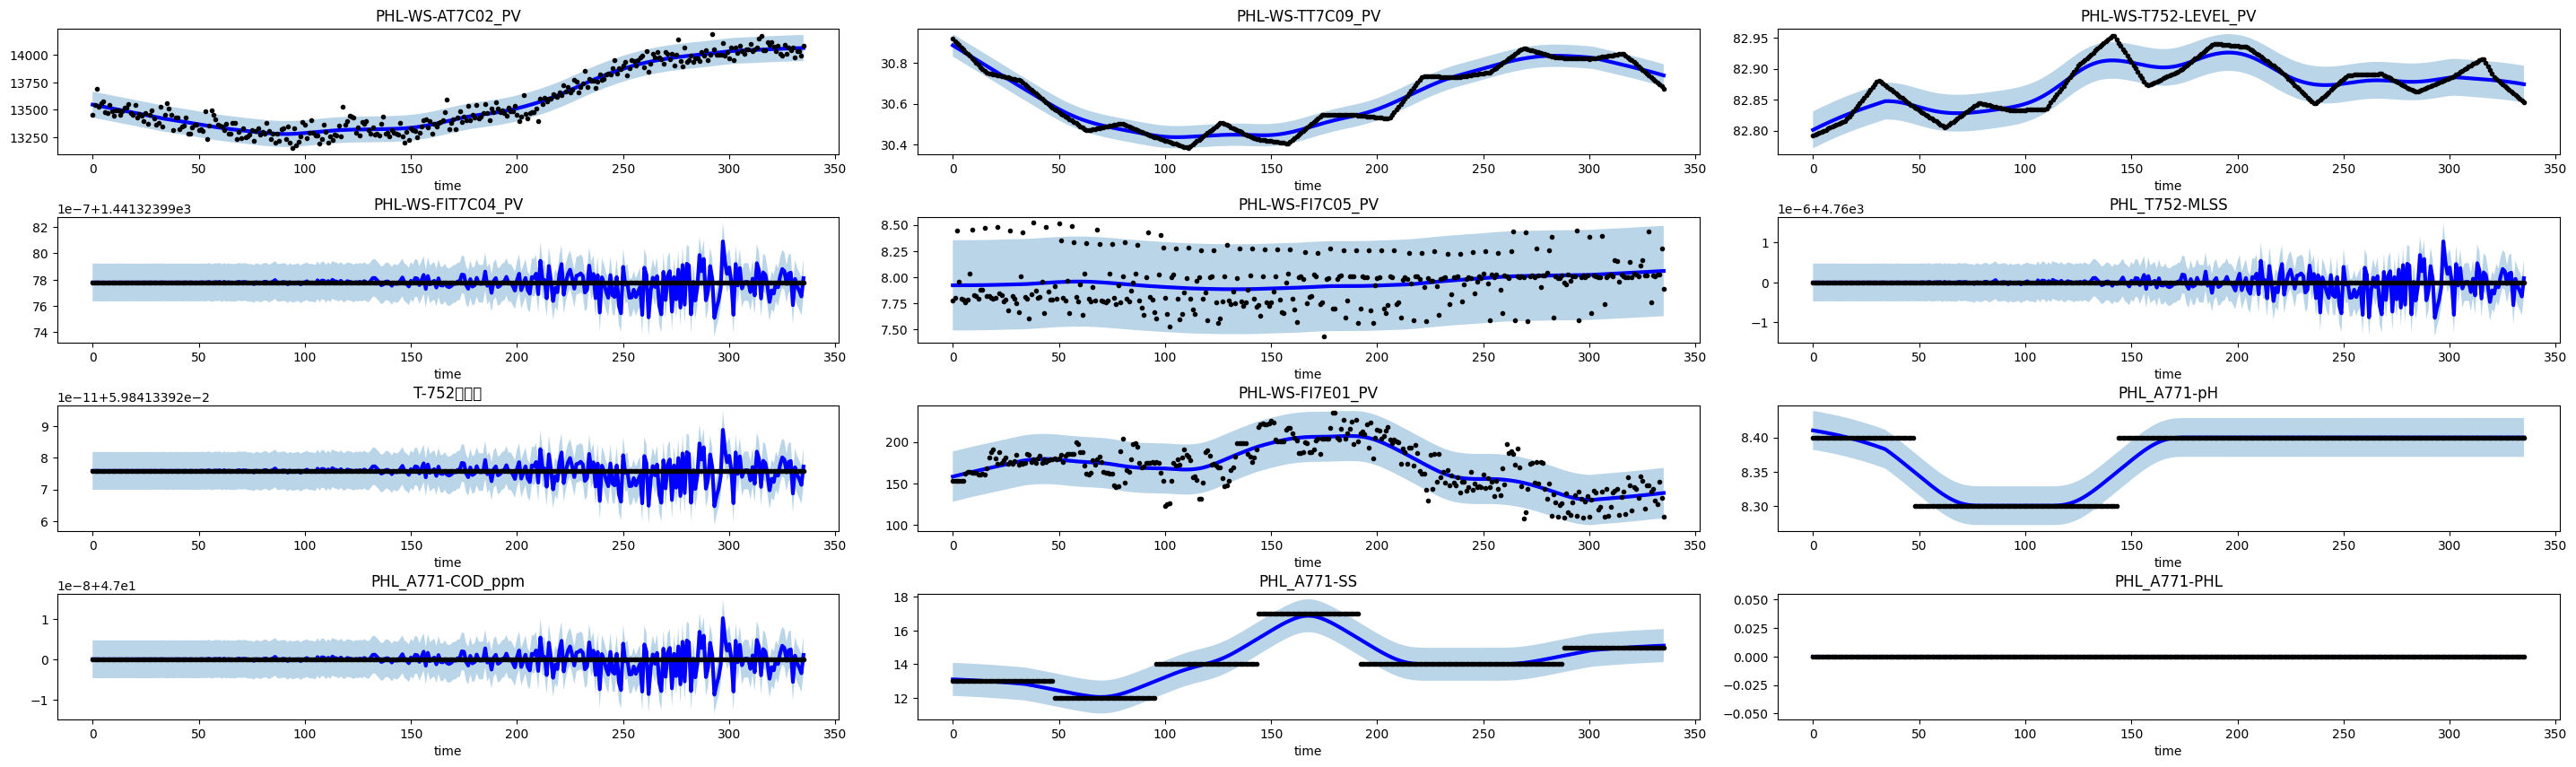

In [12]:
plot_smooth(0,48*7,df,smooth_fraction=0.2)

# 看一個月的情況

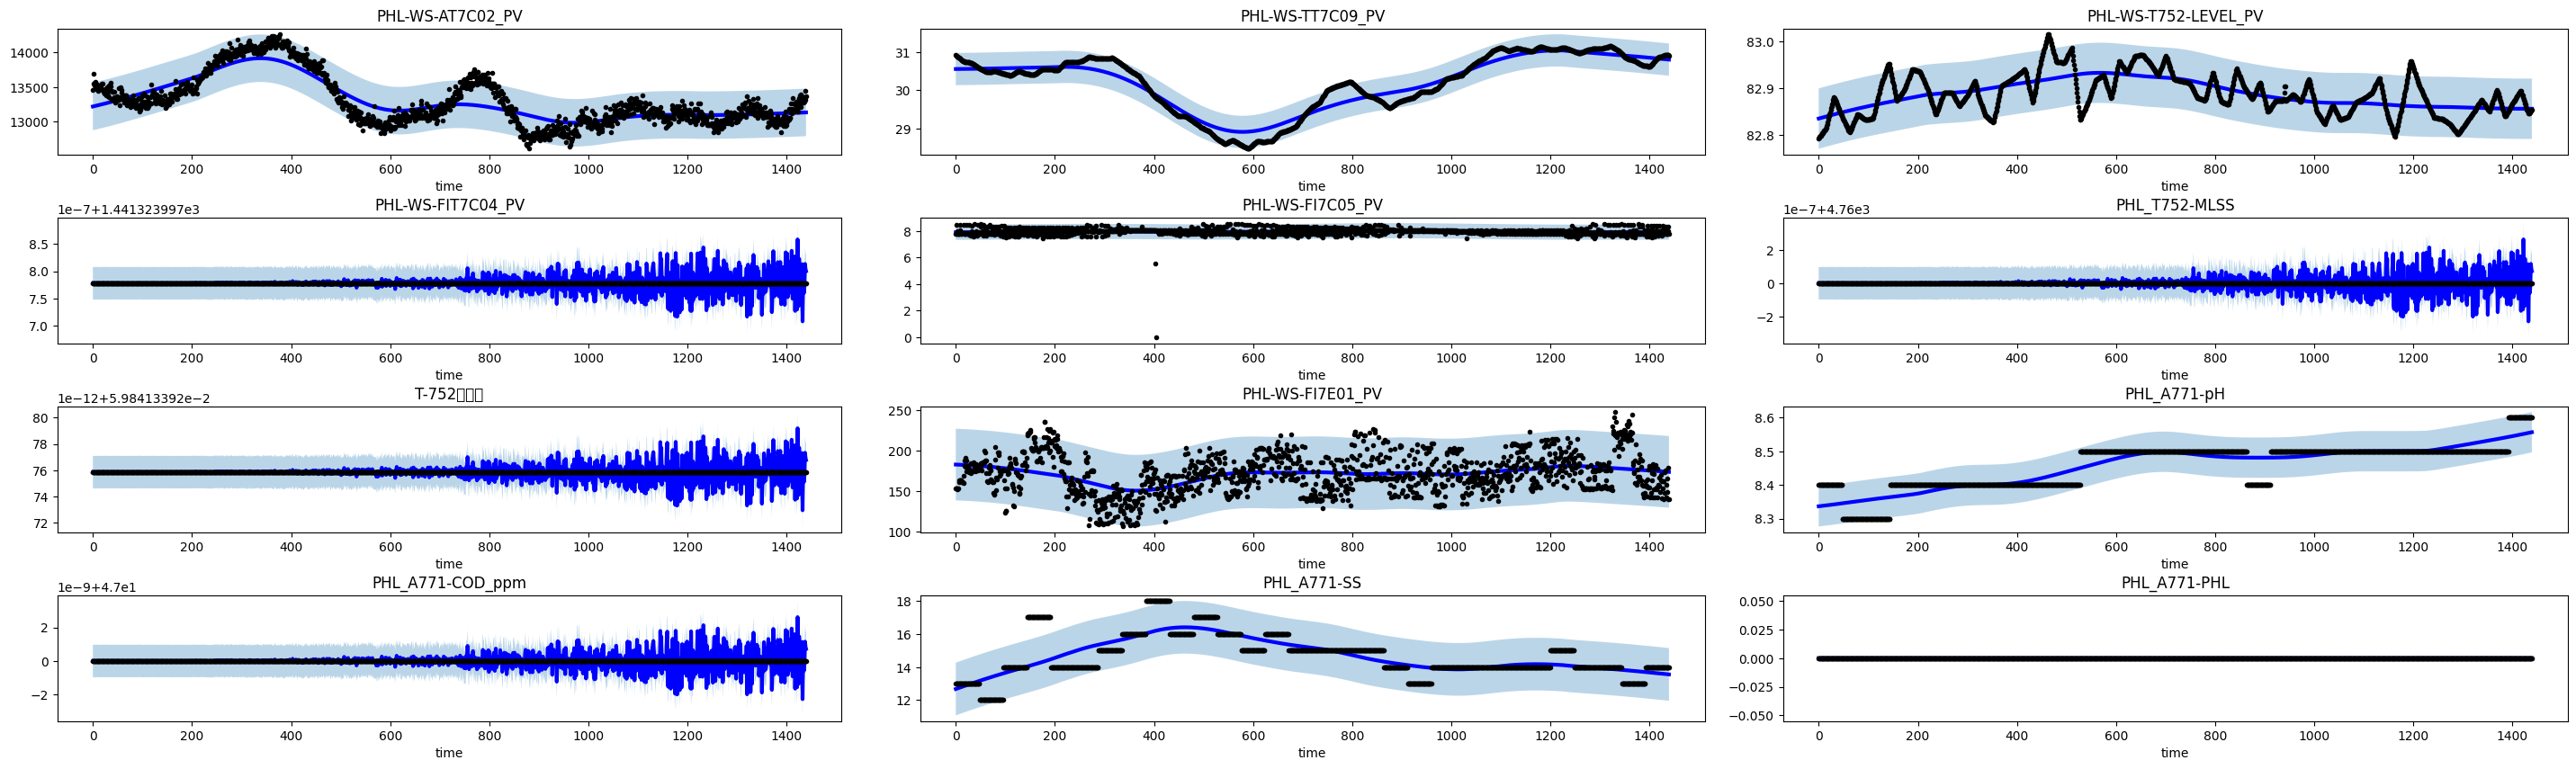

In [13]:
plot_smooth(0,48*30,df,smooth_fraction=0.3)

# 看三個月的情況

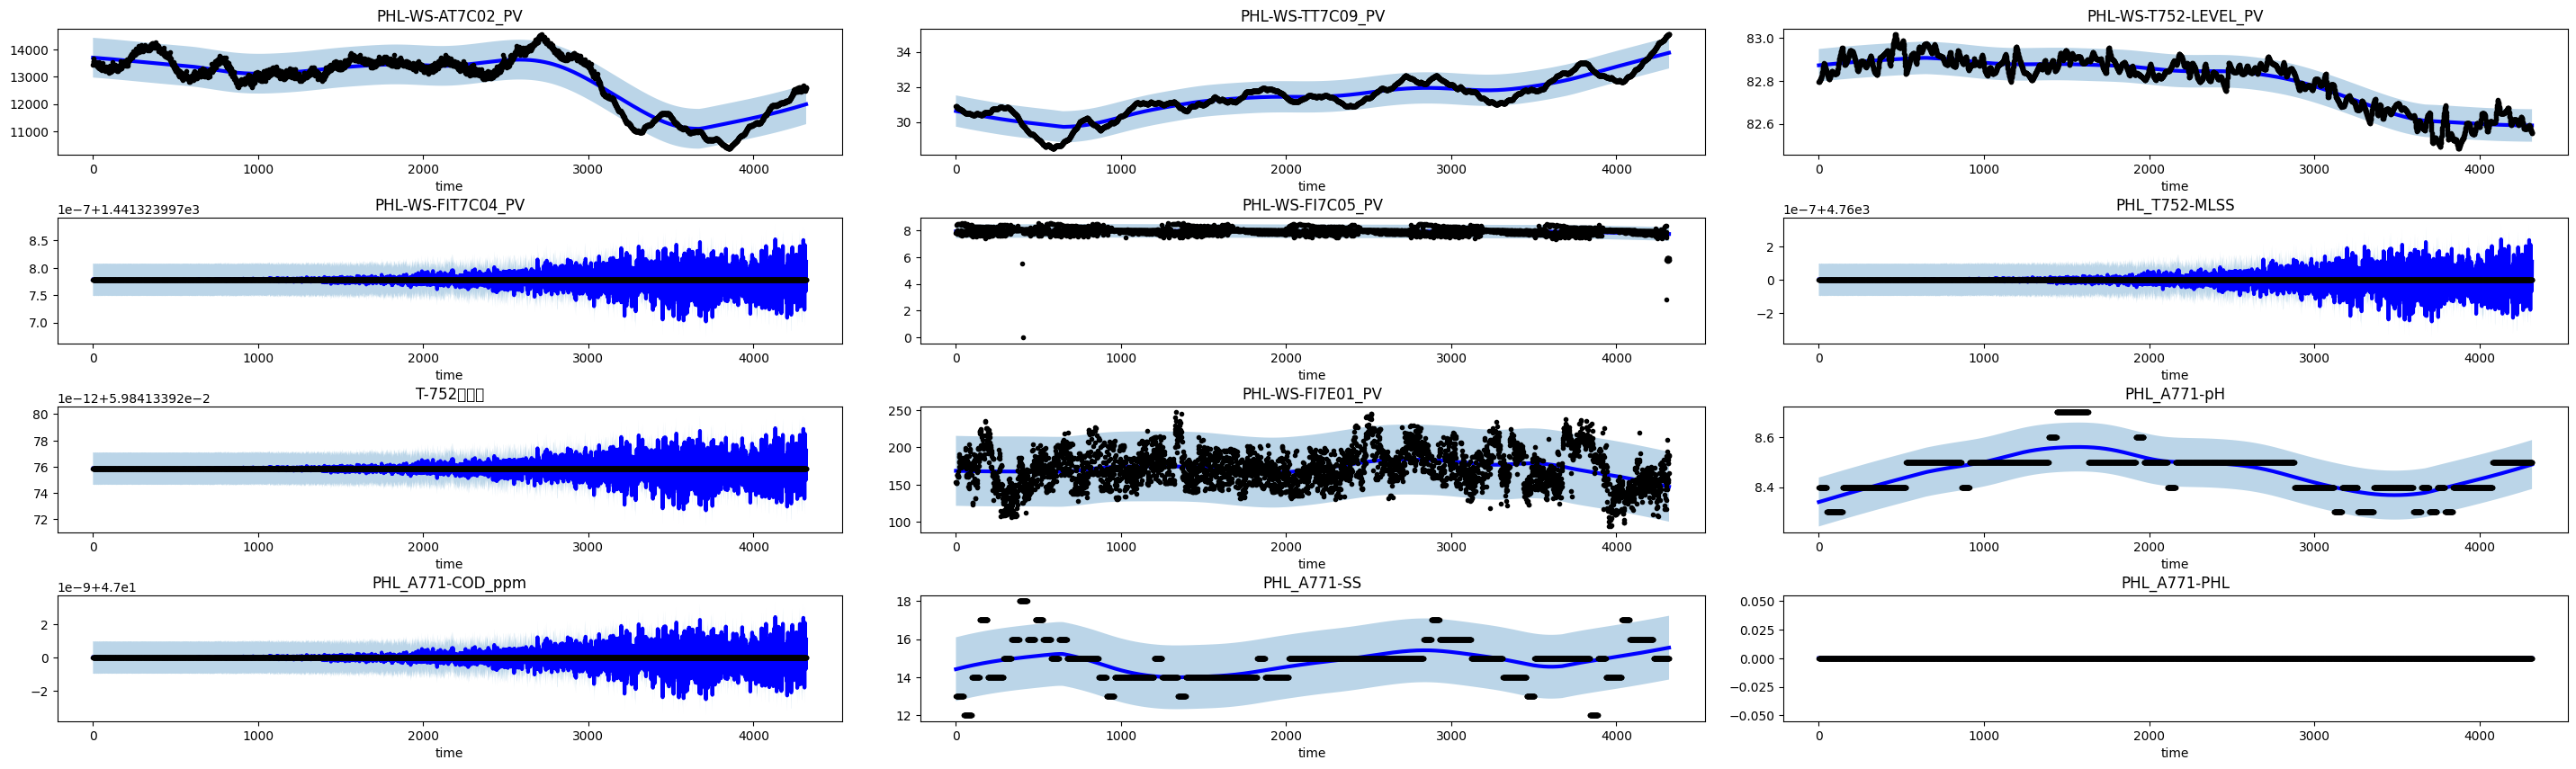

In [14]:
plot_smooth(0,48*30*3,df,smooth_fraction=0.3)